In [4]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 380.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
_upload()


FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

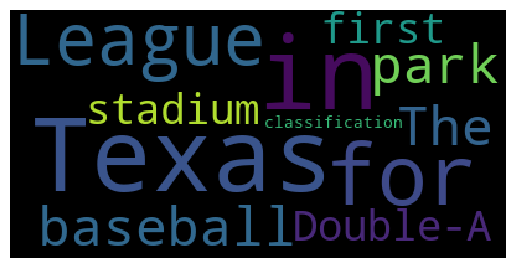

In [8]:


def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
                           "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its",
                           "they", "them", \
                           "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be",
                           "been", "being", \
                           "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when",
                           "where", "how", \
                           "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very",
                           "can", "will", "just"]

    result_file = {}
    new_file = file_contents.split()
    for word in new_file:
        if word in uninteresting_words:
            pass
        else:
            for letter in word:
                if letter in punctuations:
                    letter.replace(punctuations, "")
            if word not in result_file.keys():
                result_file[word] = 0
            else:
                result_file[word] += 1
    # wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(result_file)
    return cloud.to_array()
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()